In [1]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

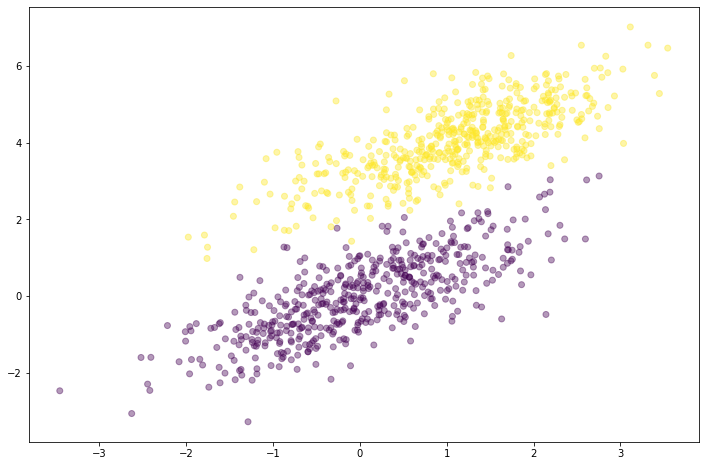

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = .4)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

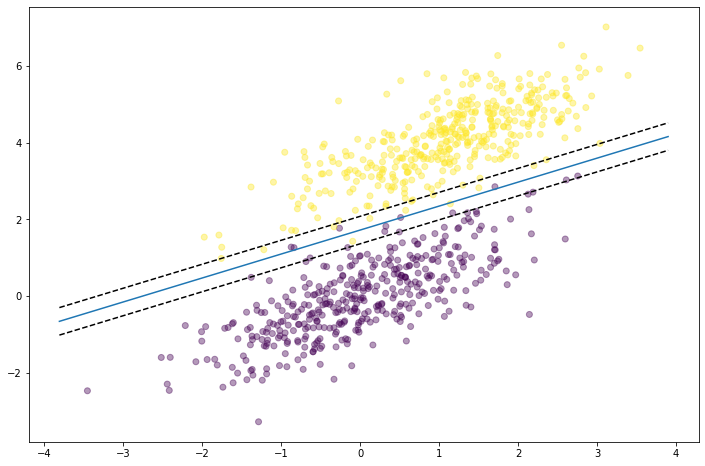

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha = 0.4);

ax = plt.gca()
xlim = ax.get_xlim()

w = clf.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(xlim[0], xlim[1])

yy = a * xx - clf.intercept_[0] / w[1]
plt.plot(xx, yy)

yy = a * xx - (clf.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')

yy = a * xx - (clf.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 98,   0],
       [  0, 102]])